# Count Publications about Exoplanets in NASA ADS containing TRAPPIST, Kepler, CHEOPS per year

## Loading the packages

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Loading the dataframe into python

Here it is important to include the statement orient = 'table', because this dataframe was exported with this option, so that the exported json is a valid json. The head of the dataframe is printed out.

In [2]:
dfExoplanetsNASA = pd.read_json('./data/dfExoplanetsNASA_v2.json', orient = 'table')
dfExoplanetsNASA = dfExoplanetsNASA[dfExoplanetsNASA.abstract != 'None'].reset_index(drop=True)

## Selecting columns to work with

For the work with this dataframe we only need the following columns 'authors', 'title', 'published' and 'abstract'. To save memory we select only these four columns to be contained in the dataframe.

In [3]:
dfExoplanetsNASA = dfExoplanetsNASA[['authors', 'title', 'published', 'abstract']]

In [4]:
dfExoplanetsNASA.head()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,authors,title,published,abstract
0,"[Zhang Bin, Qian Sheng-Bang, Liu Nian-Ping, Zh...",First photometric study of a short-period deta...,2019-07-00,NSVS 10441882 is a newly discovered eclipsing ...
1,"[M. Alvarez-Ramírez, E. Barrabés, M. Medina, M...",Ejection-Collision orbits in the symmetric col...,2019-06-00,"In this paper, we consider the collinear symme..."
2,"[Şeyda Enez, Hasan Ali Dal]",Cool spot migration and flare activity of KIC ...,2019-05-00,Analysing the photometrical data taken from th...
3,[Giacomo Fragione],Dynamical origin of S-type planets in close bi...,2019-03-00,Understanding the origin of planets that have ...
4,"[Kristina Monsch, Barbara Ercolano, Giovanni P...",The imprint of X-ray photoevaporation of plane...,2019-03-00,High-energy radiation from a planet host star ...


Now the dataframe is ready to work with. The abstracts are stored in the column 'abstract'. This column can be accessed by `dfExoplanetsNASA.abstract`.

## Checking if TRAPPIST, Kepler or CHEOPS is in abstract

Here we use regex to look up if the word TRAPPIST, Kepler or CHEOPS is in abstract. If it is in abstract in a new column 'yes' is appended otherwise an empty string.

Here you can find a helpful cheat sheet for regex: https://www.cheatography.com/davechild/cheat-sheets/regular-expressions/

In [5]:
dfExoplanetsNASA['TRAPPIST'] = ['' if not re.search('TRAPPIST|[Tt]rappist', i) else 'yes' for i in dfExoplanetsNASA.abstract]

In [6]:
dfExoplanetsNASA['Kepler'] = ['' if not re.search('[Kk]epler', i) else 'yes' for i in dfExoplanetsNASA.abstract]

In [7]:
dfExoplanetsNASA['CHEOPS'] = ['' if not re.search('CHEOPS|[Cc]heops', i) else 'yes' for i in dfExoplanetsNASA.abstract]

In [8]:
dfExoplanetsNASA.head()

,authors,title,published,abstract,TRAPPIST,Kepler,CHEOPS
0,"[Zhang Bin, Qian Sheng-Bang, Liu Nian-Ping, Zh...",First photometric study of a short-period deta...,2019-07-00,NSVS 10441882 is a newly discovered eclipsing ...,,,
1,"[M. Alvarez-Ramírez, E. Barrabés, M. Medina, M...",Ejection-Collision orbits in the symmetric col...,2019-06-00,"In this paper, we consider the collinear symme...",,,
2,"[Şeyda Enez, Hasan Ali Dal]",Cool spot migration and flare activity of KIC ...,2019-05-00,Analysing the photometrical data taken from th...,,yes,
3,[Giacomo Fragione],Dynamical origin of S-type planets in close bi...,2019-03-00,Understanding the origin of planets that have ...,,,yes
4,"[Kristina Monsch, Barbara Ercolano, Giovanni P...",The imprint of X-ray photoevaporation of plane...,2019-03-00,High-energy radiation from a planet host star ...,,,


## Count publications per year

Here with Counter all abstracts published in the same year are grouped together and their number is counted. For years without any publication there is a 0 added.

In [9]:
listPubPerYear = list(range(1995, 2020))
listPubYearsTRAPPIST = [int(dfExoplanetsNASA.published[i][:4]) for i in range(len(dfExoplanetsNASA)) if dfExoplanetsNASA.TRAPPIST[i] == 'yes']
listPubYearsKepler = [int(dfExoplanetsNASA.published[i][:4]) for i in range(len(dfExoplanetsNASA)) if dfExoplanetsNASA.Kepler[i] == 'yes']
listPubYearsCHEOPS = [int(dfExoplanetsNASA.published[i][:4]) for i in range(len(dfExoplanetsNASA)) if dfExoplanetsNASA.CHEOPS[i] == 'yes']
listPubYears = [int(dfExoplanetsNASA.published[i][:4]) for i in range(len(dfExoplanetsNASA))]
pubPerYearTRAPPIST = Counter(listPubYearsTRAPPIST)
pubPerYearKepler = Counter(listPubYearsKepler)
pubPerYearCHEOPS = Counter(listPubYearsCHEOPS)
pubPerYear = Counter(listPubYears)
pubPerYear = dict((k, pubPerYear[k]) for k in listPubPerYear)

In [10]:
def addYearWithoutPubToDict(liste, dictionary):
    for i in liste:
        if i not in dictionary:
            dictionary[i] = 0
    return dictionary

In [11]:
pubPerYearTRAPPIST = addYearWithoutPubToDict(listPubPerYear, pubPerYearTRAPPIST)
pubPerYearKepler = addYearWithoutPubToDict(listPubPerYear, pubPerYearKepler)
pubPerYearCHEOPS = addYearWithoutPubToDict(listPubPerYear, pubPerYearCHEOPS)
pubPerYear = addYearWithoutPubToDict(listPubPerYear, pubPerYear)

## Store information in dataframes

To make data more handy, let's store it in a dataframe.

In [12]:
dfGraphikAbs = pd.DataFrame({'year': listPubPerYear[::-1], 'TRAPPIST': list(pubPerYearTRAPPIST.values()), 'Kepler': list(pubPerYearKepler.values()),'CHEOPS': list(pubPerYearCHEOPS.values())}).set_index('year', drop=True)
dfGraphikAbs['totalTRAPPISTKeplerCHEOPS'] = [dfGraphikAbs.loc[i].sum() for i in dfGraphikAbs.index] 
dfGraphikAbs['absolut'] = list(pubPerYear.values())[::-1]

## Some statistics

Just give some absolute statistics:

In [13]:
sumAllPub = len(dfExoplanetsNASA)
sumTRAPPIST = dfGraphikAbs.sum()[0]
sumKepler = dfGraphikAbs.sum()[1]
sumCHEOPS = dfGraphikAbs.sum()[2]
sumTRAPPISTKeplerCHEOPS = dfGraphikAbs.sum()[3]
print('# all Publications: ' + str(sumAllPub))
print('# all Publications containing TRAPPIST: ' + str(sumTRAPPIST))
print('# all Publications containing Kepler: ' + str(sumKepler))
print('# all Publications containing CHEOPS: ' + str(sumCHEOPS))
print('# all Publications containing TRAPPIST, Kepler or CHEOPS: ' + str(sumTRAPPISTKeplerCHEOPS))

# all Publications: 29745
# all Publications containing TRAPPIST: 238
# all Publications containing Kepler: 3475
# all Publications containing CHEOPS: 122
# all Publications containing TRAPPIST, Kepler or CHEOPS: 3835


## Calculate percentage of abstracts containing TRAPPIST, Kepler or CHEOPS on all abstracts of a year

In [14]:
dfGraphikRel = dfGraphikAbs.copy()
dfGraphikRel['TRAPPIST'] = [dfGraphikRel.TRAPPIST[i]/dfGraphikRel.absolut[i]*100 if dfGraphikRel.absolut[i] != 0 else 0 for i in dfGraphikRel.index] 
dfGraphikRel['Kepler'] = [dfGraphikRel.Kepler[i]/dfGraphikRel.absolut[i]*100 if dfGraphikRel.absolut[i] != 0 else 0 for i in dfGraphikRel.index] 
dfGraphikRel['CHEOPS'] = [dfGraphikRel.CHEOPS[i]/dfGraphikRel.absolut[i]*100 if dfGraphikRel.absolut[i] != 0 else 0 for i in dfGraphikRel.index] 
dfGraphikRel = dfGraphikRel[['TRAPPIST','Kepler','CHEOPS']]
dfGraphikRel

,TRAPPIST,Kepler,CHEOPS
year,,,
2019,4.852686,15.424610,0.693241
2018,2.493639,11.399491,0.661578
2017,2.407537,12.840195,0.593161
2016,0.420905,13.924939,0.526131
2015,0.190186,17.459110,0.760746
2014,0.184980,13.762486,0.665927
2013,0.282087,16.314057,0.329102
2012,0.235073,13.352139,0.047015
2011,0.459184,13.928571,0.204082


Text(0, 0.5, 'percentage of abstracts containing TRAPPIST, Kepler or CHEOPS')

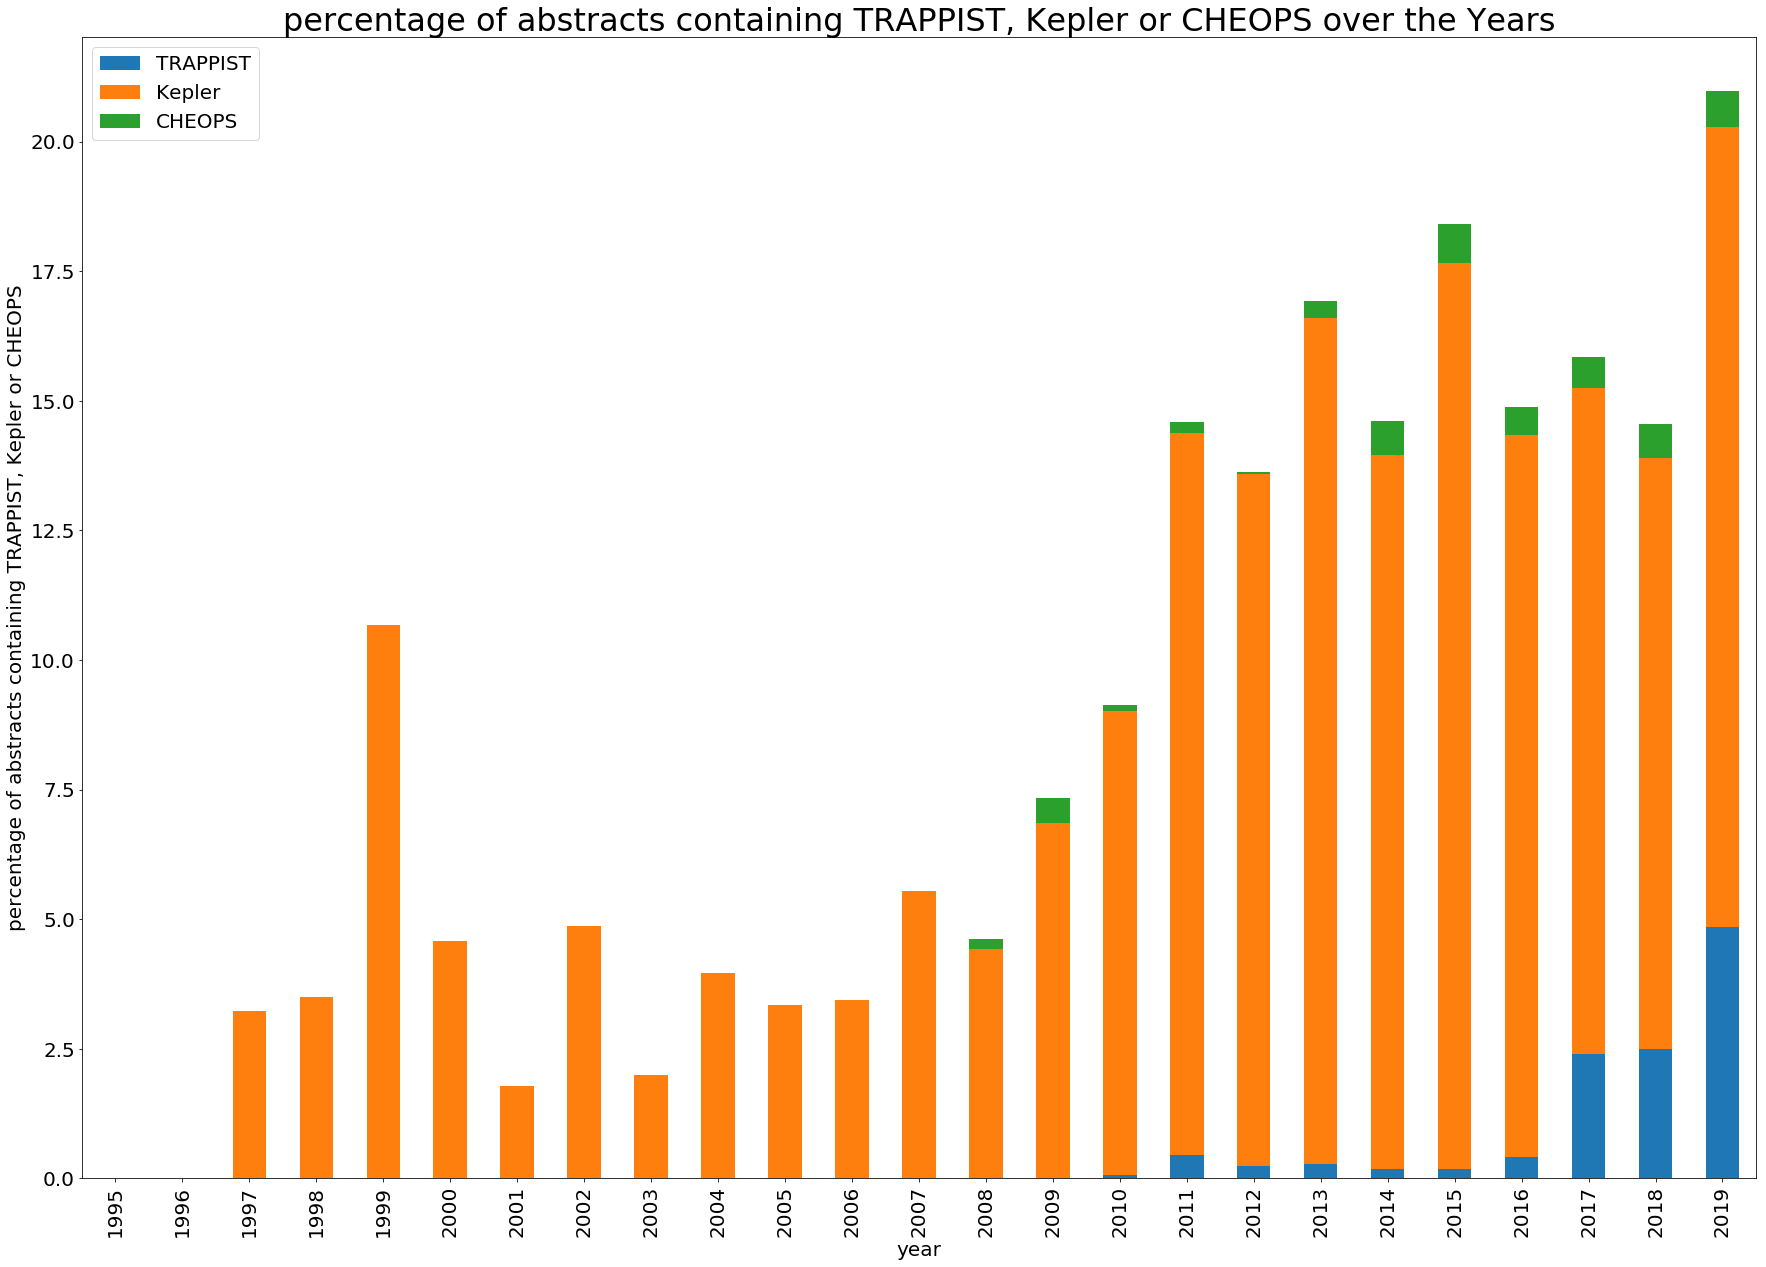

In [15]:
Graphik1 = dfGraphikRel.loc[listPubPerYear,['TRAPPIST','Kepler','CHEOPS']].plot.bar(stacked=True, figsize=(30,21), fontsize=20)
Graphik1.legend(fontsize=20)
plt.title('percentage of abstracts containing TRAPPIST, Kepler or CHEOPS over the Years', fontsize=32)
plt.xlabel('year', fontsize=20)
plt.ylabel('percentage of abstracts containing TRAPPIST, Kepler or CHEOPS', fontsize=20)